# Reciprocal Pairs Synapse Visualizer
Pairs of neurons in the Layer 2/3 volume that synapse onto one another

This notebook is modified from Allen Institute tutorial on working with Meshes by Forrest Collman  
The original tutorial is located here: https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/intro/MeshExample.ipynb

You will need to run this notebook in a Python 3.7 environment  
Sometime meshparty will have a conflict with other tools and not work properly in Anaconda  
If that happens, you will need to start over with a new Anaconda environment  
Install allensdk first, then meshparty, then any other other tools desired  
The installation described below worked well:
* Install new environment v3.7 in Anaconda
* conda install jupyter
* pip install allensdk
* pip install meshparty
* pip install caveclient
* pip install 'itkwidgets[notebook]>=1.0a8'
* pip install --upgrade --pre itk
* pip install gdown

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
from meshparty import trimesh_io, trimesh_vtk, skeleton, utils

In [3]:
# setup the mesh meta to handle downloads and caching
mesh_dir = 'data/neuron_meshes_v185/' # or change to your desired folder
seg_source = "precomputed://https://storage.googleapis.com/microns_public_datasets/pinky100_v185/seg"
mm = trimesh_io.MeshMeta(cv_path=seg_source,
                         disk_cache_path=mesh_dir, 
                         cache_size=20)

## Enter two neurons that synapse onto one another
Use the `list_of_all_reciprocal_pairs.ipynb`notebook to look up reciprocal pairs of neurons.  
Use the `reciprocal_pairs_neurons_with_some_in_volume.ipynb` to look up pairs that have an identified soma in the volume.  
Special thanks to Wanwen Zeng at Stanford for generating the dataframe in the `paired.csv` file. 

In [4]:
cell_id1 = 648518346349528994  
cell_id2 = 648518346349538192

# some interesting reciprocal pairs
# cell_id1 = 648518346349528994  cell_id2 = 648518346349538192 two neurons with highest number of reciprocal synapses in volume (n=17 + n=3 = 20)
# cell_id1 = 648518346349528994  cell_id2 = 648518346349539539 two neurons (one basket and one pyr) with 18 reciprocal synapses (2+16)
# cell_id1 = 648518346349539215  cell_id2 = 648518346349539464 one basket and one pyr with 2+15 reciprocal synapses
# cell_id1 = 648518346349539846  cell_id2 = 648518346349538179 inhibitory Basket and inhibitory Martinotti neurons
# cell_id1 = 648518346349538179  cell_id2 = 648518346349515986 inhibitory Martinotti and inhibitory bipolar neurons
# cell_id1 = 648518346349538179  cell_id2 = 648518346349533227 inhibitory Martinotti and excitatory pyramidal neurons
# cell_id1 = 648518346343899987  cell_id2 = 648518346343998088 partial axons synapsing onto one another
# cell_id1 = 648518346349376348  cell_id2 = 648518346349384302 partial axon and spiny dendrite with dense processes
# cell_id1 = 648518346349540055  cell_id2 = 648518346344132118 pre-synaptic site on a dendritic spine (mis-segmentation?)
# cell_id1 = 648518346349515985  cell_id2 = 648518346349516055 two inhibitory cells of unknown type
# cell_id1 = 648518346349536744  cell_id2 = 648518346341407207 pyramidal neuron and partial unknown neuron
# cell_id1 = 648518346349518096  cell_id2 = 648518346342923789 inhibitory neuron of unknown type and partial processes of other unknown type
# cell_id1 = 648518346349538179  cell_id2 = 648518346349537400 partial exc pyr neuron and Martinotti inhibitory neuron
# cell_id1 = 648518346349539846  cell_id2 = 648518346349533058 inhibitory basket neuron and excitatory pyramidal neuron with 7+14 = 21 reciprocal synapses


In [5]:
# If you get an error, run the next cell to download the mesh, then rerun this cell again
seg_id = cell_id1
mesh_file = os.path.join(mesh_dir, str(seg_id)+'.h5')
mesh = mm.mesh(filename = mesh_file)

In [6]:
# If you get an error on the previous cell, run this cell
# After the mesh is successfully downloaded, rerun the previous cell 
downloadmesh1 = mm.mesh(seg_id = seg_id, remove_duplicate_vertices=True)

In [7]:
seg_id

648518346349528994

In [8]:
mesh_file

'data/neuron_meshes_v185/648518346349528994.h5'

In [9]:
mesh.n_vertices, mesh.n_faces

(1887187, 3773130)

In [10]:
# If you get an error, run the next cell to download the mesh, then rerun this cell again
second_seg_id = cell_id2
second_mesh = mm.mesh(seg_id = second_seg_id, remove_duplicate_vertices=True)

In [11]:
# If you get an error on the previous cell, run this cell
# After the mesh is successfully downloaded, rerun the previous cell 
downloadmesh2 = mm.mesh(seg_id = second_seg_id, remove_duplicate_vertices=True)

In [12]:
second_seg_id

648518346349538192

In [13]:
second_mesh.n_vertices

1623745

In [14]:
# read in the full synapse table
soma_subgraph_df = pd.read_csv('data/pni_synapses_v185.csv')

In [15]:
soma_subgraph_df.head()

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx
0,2715757,648518346349538285,648518346349536759,1103,280784,261896,40600,70050,65534,1015,70196,65474,1015,70104,65602,1015
1,12498,648518346342404863,648518346342414574,62,365832,292808,25800,91472,73196,645,91458,73202,645,91396,73216,645
2,12500,648518346342921567,648518346345323296,62,229144,155952,48080,57250,39028,1202,57286,38988,1202,57312,38966,1203
3,12517,648518346342796822,648518346349537255,955,398452,208560,50760,99538,52184,1276,99613,52140,1269,99550,52098,1276
4,12503,648518346342800412,648518346348190542,718,461868,245212,53560,115462,61350,1335,115467,61303,1339,115468,61296,1335


In [16]:
# filter all the pre- and post- synapses for cell_id1
cell_post_subgraph_all = soma_subgraph_df.query(f'post_root_id=={seg_id}') #this shows all post-syn sites on seg_id cell
cell_pre_subgraph_all = soma_subgraph_df.query(f'pre_root_id=={seg_id}') #this one shows all pre-syn sites on the axon of seg_id cell

# make an array of xyz synapse positions
postsyn_xyz_all=cell_post_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values
presyn_xyz_all=cell_pre_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

(310932.84375, 147705.65625)

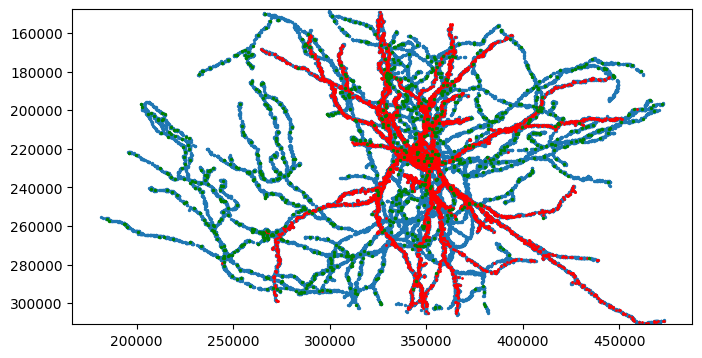

In [17]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(mesh.vertices[::50,0], mesh.vertices[::50,1], s=2, alpha=1) # modify s and alpha to improve the visualization

ax.scatter(postsyn_xyz_all[:,0], postsyn_xyz_all[:,1], c='red', s=1, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

ax.scatter(presyn_xyz_all[:,0], presyn_xyz_all[:,1], c='green', s=2, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

In [18]:
len(postsyn_xyz_all)

4831

In [19]:
len(presyn_xyz_all)

1082

In [20]:
# this field will create a df that only reveals the second_seg_id (pre) synapses onto the seg_id (post) neuron
pre_to_post_only = soma_subgraph_df["pre_root_id"] == second_seg_id

In [21]:
pre_to_post_only_df=soma_subgraph_df.loc[pre_to_post_only, ["id", "pre_root_id", "post_root_id", "cleft_vx", "ctr_pt_x_nm", "ctr_pt_y_nm", "ctr_pt_z_nm", "pre_pos_x_vx", "pre_pos_y_vx", "pre_pos_z_vx", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx", "post_pos_x_vx", "post_pos_y_vx", "post_pos_z_vx"]]

In [22]:
pre_to_post_only_df # this lists all of the second_seg_id (pre) synapses

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx
8871,1476515,648518346349538192,648518346349538279,566,399848,262612,34600,99956,65716,864,99962,65653,865,99890,65634,864
13667,883942,648518346349538192,648518346349537421,143,392000,254792,44120,97950,63744,1102,98000,63698,1103,98026,63652,1102
13690,496573,648518346349538192,648518346349537923,104,378680,199640,39720,94642,49938,992,94670,49910,993,94704,49890,993
34902,1488225,648518346349538192,648518346347477410,223,341416,240184,59440,85354,60016,1484,85354,60046,1486,85436,60086,1483
34908,1690608,648518346349538192,648518346341395530,261,392344,276280,57200,98062,69098,1432,98086,69070,1430,98078,69022,1432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118314,1589221,648518346349538192,648518346349528994,241,378968,172008,36640,94746,43034,913,94742,43002,916,94692,42948,913
3118559,3352667,648518346349538192,648518346349528994,144,371580,178836,36080,92924,44734,902,92895,44709,902,92830,44692,902
3123075,335643,648518346349538192,648518346349528465,89,365416,258848,74400,91394,64688,1861,91354,64712,1860,91296,64710,1861
3137121,1513783,648518346349538192,648518346349537790,227,443636,231260,44080,110826,57828,1098,110909,57815,1102,110916,57814,1098


The following cell should now filter it so that we only reveal the synapses of second_seg_id (pre) onto seg_id (post)

In [23]:
# this cell and the next will reveal the second_seg_id synapses (pre) onto the seg_id (post) cell
cell_post_subgraph_recip = pre_to_post_only_df.query(f'post_root_id=={seg_id}')

# make an array of xyz synapse positions
postsyn_xyz_recip=cell_post_subgraph_recip[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

In [24]:
len(pre_to_post_only_df.query(f'post_root_id=={seg_id}'))

3

(310932.84375, 147705.65625)

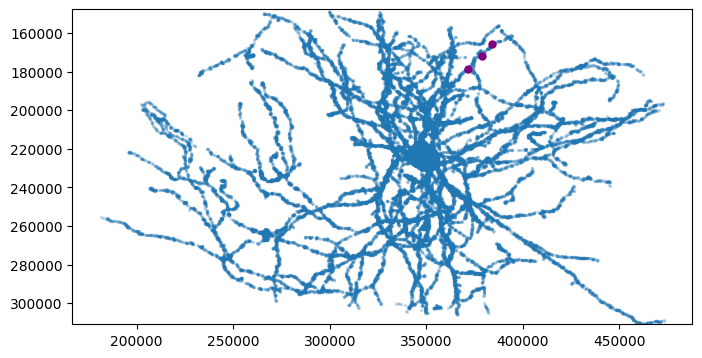

In [25]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(mesh.vertices[::50,0], mesh.vertices[::50,1], s=2, alpha=0.2) # modify s and alpha to improve the visualization

ax.scatter(postsyn_xyz_recip[:,0], postsyn_xyz_recip[:,1], c='purple', s=25, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

# 3D visualization
Your computer will need OpenGL installed in order for this tool to work  
It will open in a separate window

In [26]:
import vtk

In [27]:
#create vtk actors for each mesh and one for their shared synapses
mesh_actor = trimesh_vtk.mesh_actor(second_mesh, opacity=.3, color=(0.7, 0.7, 0.7))
pre_mesh_actor = trimesh_vtk.mesh_actor(mesh, opacity=.3, color=(0.2, 0.4, 0.7))
syn_actor = trimesh_vtk.point_cloud_actor(postsyn_xyz_recip, size=1500, color=(0.9, 0.2, 0.2)) 

#creating a camera object and defining the view
camera = trimesh_vtk.oriented_camera(mesh.centroid, backoff=400)

#render the actors, will open a pop up python window
trimesh_vtk.render_actors([mesh_actor,syn_actor,pre_mesh_actor], camera=camera)

setting up renderer
done setting up
actors added
camera set
render done
finalizing..


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer(0x00000230E5CD7E40) at 0x0000023092C21168>

# In the following cells, the cell_ids are reversed

In [28]:
recip1 = cell_id2  
recip2 = cell_id1

In [29]:
# Read mesh off disk
rseg_id = recip1
rmesh_file = os.path.join(mesh_dir, str(rseg_id)+'.h5')
rmesh = mm.mesh(filename = rmesh_file)

In [30]:
mesh.n_vertices, mesh.n_faces

(1887187, 3773130)

In [31]:
rsecond_seg_id = recip2
rsecond_mesh = mm.mesh(seg_id = rsecond_seg_id, remove_duplicate_vertices=True)

In [32]:
second_mesh.n_vertices

1623745

In [33]:
# this cell and the next one will show all synapses on the seg_id (presynaptic) cell and color code them by post-synaptic sites (red)
# and pre-synaptic sites (green); the latter will predominately be on the axon (efferent) 
# filter the synapses onto this cell
rcell_post_subgraph_all = soma_subgraph_df.query(f'post_root_id=={rseg_id}') #this shows all post-syn sites on seg_id cell
rcell_pre_subgraph_all = soma_subgraph_df.query(f'pre_root_id=={rseg_id}') #this one shows all pre-syn sites on the axon of seg_id cell

# make an array of xyz synapse positions
rpostsyn_xyz_all=rcell_post_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values
rpresyn_xyz_all=rcell_pre_subgraph_all[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

(310932.84375, 147705.65625)

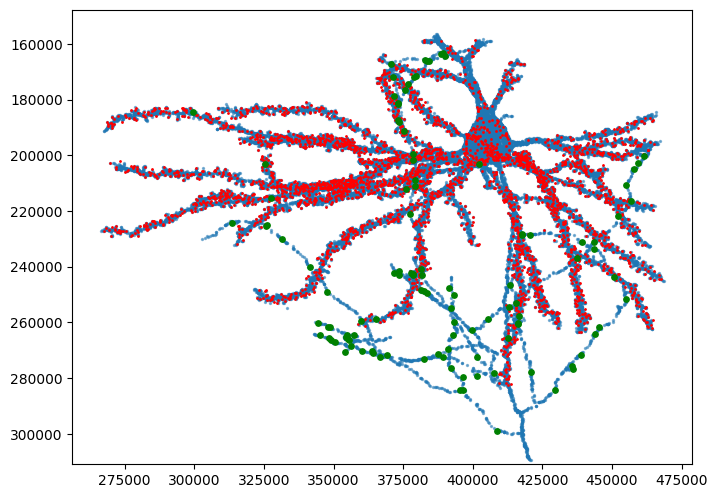

In [34]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(rmesh.vertices[::50,0], rmesh.vertices[::50,1], s=2, alpha=0.5) # modify s and alpha to improve the visualization

ax.scatter(rpostsyn_xyz_all[:,0], rpostsyn_xyz_all[:,1], c='red', s=1, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

ax.scatter(rpresyn_xyz_all[:,0], rpresyn_xyz_all[:,1], c='green', s=15, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

In [35]:
len(rpostsyn_xyz_all)

3357

In [36]:
len(rpresyn_xyz_all)

114

In [37]:
# this field will create a df that only reveals the second_seg_id (pre) synapses onto the seg_id (post) neuron
rpre_to_post_only = soma_subgraph_df["pre_root_id"] == rsecond_seg_id

In [38]:
rpre_to_post_only_df=soma_subgraph_df.loc[rpre_to_post_only, ["id", "pre_root_id", "post_root_id", "cleft_vx", "ctr_pt_x_nm", "ctr_pt_y_nm", "ctr_pt_z_nm", "pre_pos_x_vx", "pre_pos_y_vx", "pre_pos_z_vx", "ctr_pos_x_vx", "ctr_pos_y_vx", "ctr_pos_z_vx", "post_pos_x_vx", "post_pos_y_vx", "post_pos_z_vx"]]

In [39]:
rpre_to_post_only_df # this lists all of the second_seg_id (pre) synapses

,id,pre_root_id,post_root_id,cleft_vx,ctr_pt_x_nm,ctr_pt_y_nm,ctr_pt_z_nm,pre_pos_x_vx,pre_pos_y_vx,pre_pos_z_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,post_pos_x_vx,post_pos_y_vx,post_pos_z_vx
14557,695458,648518346349528994,648518346349537592,123,461024,179888,19520,115198,45002,490,115256,44972,488,115286,44988,491
78908,167729,648518346349528994,648518346349539886,75,310200,193352,21560,77498,48326,538,77550,48338,539,77600,48328,538
103603,2144550,648518346349528994,648518346349540051,400,427192,178592,43080,106746,44598,1071,106798,44648,1077,106800,44668,1071
109232,2158662,648518346349528994,648518346349539579,404,371640,233608,54240,92922,58380,1353,92910,58402,1356,92834,58410,1354
121100,222873,648518346349528994,648518346349538378,79,287224,165616,6880,71764,41388,171,71806,41404,172,71844,41388,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238865,3081545,648518346349528994,648518346349536924,57,349668,241224,83080,87372,60338,2079,87417,60306,2077,87292,60288,2077
3239039,1720772,648518346349528994,648518346349539103,268,379424,164288,73080,94832,41022,1828,94856,41072,1827,94830,41126,1828
3239040,2866606,648518346349528994,648518346349539103,238,377568,184700,68000,94318,46178,1703,94392,46175,1700,94420,46152,1703
3239041,2370007,648518346349528994,648518346349539103,535,376448,170200,80760,94074,42612,2021,94112,42550,2019,94036,42522,2021


In [40]:
# this cell and the next will reveal the second_seg_id synapses (pre) onto the seg_id (post) cell
# if there are none, the display will not have any dots to indicate the synapses (since it is zero)
rcell_post_subgraph_recip = rpre_to_post_only_df.query(f'post_root_id=={rseg_id}')

# make an array of xyz synapse positions
rpostsyn_xyz_recip = rcell_post_subgraph_recip[['ctr_pt_x_nm', 'ctr_pt_y_nm', 'ctr_pt_z_nm']].values

In [41]:
len(rpre_to_post_only_df.query(f'post_root_id=={rseg_id}'))

17

(310932.84375, 147705.65625)

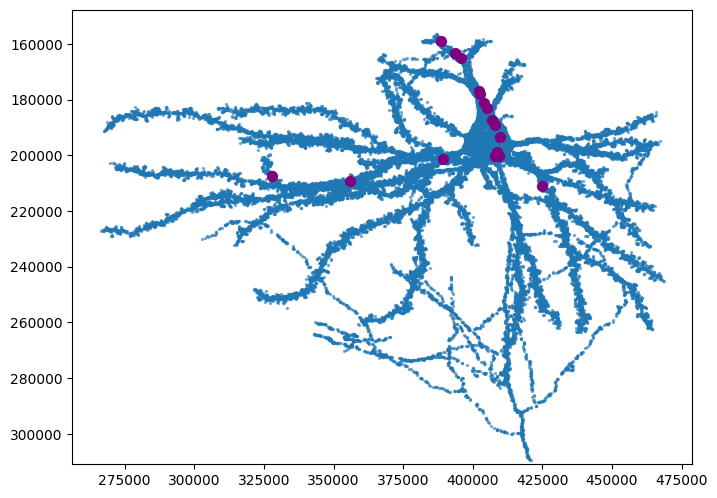

In [42]:
f,ax = plt.subplots(figsize=(8,8))
ax.scatter(rmesh.vertices[::50,0], rmesh.vertices[::50,1], s=2, alpha=0.5) # modify s and alpha to improve the visualization

ax.scatter(rpostsyn_xyz_recip[:,0], rpostsyn_xyz_recip[:,1], c='purple', s=50, alpha=1) # modify c, s, and alpha if desired
ax.set_aspect('equal')
ax.set_ylim(np.max(mesh.vertices[:,1]), np.min(mesh.vertices[:,1]))

In [43]:
# 3d visualization using vtk

#create vtk actors for each mesh and one for their shared synapses
rmesh_actor = trimesh_vtk.mesh_actor(rmesh, opacity=.3, color=(0.7, 0.7, 0.7))
rpre_mesh_actor = trimesh_vtk.mesh_actor(rsecond_mesh, opacity=.3, color=(0.2, 0.4, 0.7))
rsyn_actor = trimesh_vtk.point_cloud_actor(rpostsyn_xyz_recip, size=1500, color=(0.2, 0.9, 0.2)) 

#creating a camera object and defining the view
camera = trimesh_vtk.oriented_camera(mesh.centroid, backoff=400)

#render the actors, will open a pop up python window
trimesh_vtk.render_actors([rmesh_actor,rsyn_actor,rpre_mesh_actor], camera=camera)

setting up renderer
done setting up
actors added
camera set
render done
finalizing..


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer(0x00000230E5CDAEC0) at 0x0000023092C5FC48>

# 3D visualization of reciprocal synapses

In [44]:
# 3d visualization using vtk

#create vtk actors for each mesh and one for their shared synapses
rmesh_actor = trimesh_vtk.mesh_actor(rmesh, opacity=.3, color=(0.7, 0.7, 0.7))
rpre_mesh_actor = trimesh_vtk.mesh_actor(rsecond_mesh, opacity=.3, color=(0.2, 0.4, 0.7))
rsyn_actor = trimesh_vtk.point_cloud_actor(rpostsyn_xyz_recip, size=1000, color=(0.2, 0.9, 0.2))
syn_actor = trimesh_vtk.point_cloud_actor(postsyn_xyz_recip, size=1000, color=(0.9, 0.2, 0.2))

#creating a camera object and defining the view
camera = trimesh_vtk.oriented_camera(mesh.centroid, backoff=400)

#render the actors, will open a pop up python window
trimesh_vtk.render_actors([rmesh_actor,rsyn_actor,syn_actor, rpre_mesh_actor], camera=camera)

setting up renderer
done setting up
actors added
camera set
render done
finalizing..


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer(0x00000230E5CDB4D0) at 0x0000023092C56168>